****
I am using <a href=http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip>Lahman Baseball dataset</a>
<br/>You can find information about the meaning of the columns and the data in the readme.txt file in Data directory.


In [1]:
import pandas as pd

In [7]:
path_to_data = 'Data/Lahman_Baseball_Dataset/'

* Using ipython's magic functions to view the directory listing.
<br/>(Type %magic to get an overview of all ipython magic functions.)

In [8]:
%ls $path_to_data 

AllstarFull.csv          FieldingOF.csv    Salaries.csv
Appearances.csv          FieldingPost.csv  Schools.csv
AwardsManagers.csv       HallOfFame.csv    SchoolsPlayers.csv
AwardsPlayers.csv        Managers.csv      SeriesPost.csv
AwardsShareManagers.csv  ManagersHalf.csv  Teams.csv
AwardsSharePlayers.csv   Master.csv        TeamsFranchises.csv
Batting.csv              Pitching.csv      TeamsHalf.csv
BattingPost.csv          PitchingPost.csv
Fielding.csv             readme2013.txt


* Let's load Master.csv and play around it.

In [9]:
master = pd.read_csv(path_to_data + 'Master.csv')

In [10]:
# Check first few rows.
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205,75,R,R,2004-04-06,2013-09-28,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [15]:
# Print column name
print master.columns
print '"Master.csv" has total ',len(master.columns), ' columns'

Index([u'playerID', u'birthYear', u'birthMonth', u'birthDay', u'birthCountry',
       u'birthState', u'birthCity', u'deathYear', u'deathMonth', u'deathDay',
       u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
       u'nameGiven', u'weight', u'height', u'bats', u'throws', u'debut',
       u'finalGame', u'retroID', u'bbrefID'],
      dtype='object')
"Master.csv" has total  24  columns


In [16]:
# Count number of rows (unix: wc -l)
len(master)

18354

* Get descriptive statistics for any or all columns

In [17]:
master.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18200.000000,18014.000000,17839.000000,9128.000000,9127.000000,9126.000000,17477.000000,17533.000000
mean,1929.127143,6.625958,15.605695,1962.900745,6.483949,15.537037,185.232134,72.217133
std,40.584996,3.465990,8.746157,30.960678,3.526323,8.789128,20.769155,2.595477
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1894.000000,4.000000,8.000000,1941.000000,3.000000,8.000000,170.000000,71.000000
50%,1933.000000,7.000000,15.000000,1966.000000,6.000000,15.000000,185.000000,72.000000
75%,1966.000000,10.000000,23.000000,1988.000000,10.000000,23.000000,195.000000,74.000000
max,1993.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,320.000000,83.000000


**SELECT**

In [18]:
# SELECT playerID, nameLast, nameFirst FROM master (and show only first lines)
master[['playerID', 'nameLast', 'nameFirst']].head()

,playerID,nameLast,nameFirst
0,aardsda01,Aardsma,David
1,aaronha01,Aaron,Hank
2,aaronto01,Aaron,Tommie
3,aasedo01,Aase,Don
4,abadan01,Abad,Andy


Note the difference between:

  * master[['playerID']] returns a DataFrame with one column,
  * master['playerID'] returns a Series (i.e., a pandas-kind of dictionary), and
  * master.playerID, which is equivalent to master['playerID'].

In [19]:
master[['playerID']].head(3)

,playerID
0,aardsda01
1,aaronha01
2,aaronto01


In [20]:
master['playerID'].head(3)

0    aardsda01
1    aaronha01
2    aaronto01
Name: playerID, dtype: object

In [21]:
master.playerID.head(3)

0    aardsda01
1    aaronha01
2    aaronto01
Name: playerID, dtype: object

** Manipulating data **

Let's look at the batting file. Note that:
   * AB = At Bats
   * HR = Homeruns
   * RBI = Runs Batted In

In [22]:
batting = pd.read_csv(path_to_data + 'Batting.csv')

In [23]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,...,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,aardsda01,2008,1,BOS,AL,47,5,1,0,0,...,0,0,0,1,0,0,0,0,0,5
4,aardsda01,2009,1,SEA,AL,73,3,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


**WHERE**

  * Similar to the SQL WHERE clause, we can filter to the rows that are relavant.
  * We can do so by providing any boolean mask, or condition on a column.
  * Similar to selecting columns, we provide as a key to our dataframe some condition

In [24]:
# SELECT playerID, nameLast, nameFirst 
# FROM batting
# WHERE yearID = 2013
batting[['playerID', 'yearID', 'HR', 'RBI']][batting['yearID'] == 2013].head()

,playerID,yearID,HR,RBI
96600,aardsda01,2013,0,0
96601,abadfe01,2013,0,0
96602,abreuto01,2013,2,14
96603,ackledu01,2013,4,31
96604,adamsda02,2013,2,13


** Unique Count **

In [25]:
batting.yearID.unique()

array([2004, 2006, 2007, 2008, 2009, 2010, 2012, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 2001,
       2003, 2011, 1875, 1897, 1898, 1903, 1904, 1905, 1907, 1908, 1909,
       1910, 1892, 1893, 1894, 1895, 1896, 1890, 1983, 1997, 1998, 1999,
       2000, 1991, 1992, 1993, 1994, 1995, 1996, 2002, 1950, 1953, 1871,
       1952, 2005, 1942, 1943, 1944, 1946, 1947, 1948, 1949, 1911, 1951,
       1923, 1906, 1920, 1921, 1922, 1913, 1914, 1915, 1916, 1918, 1931,
       1941, 1945, 1912, 1919, 1924, 1925, 1926, 1917, 1932, 1939, 1879,
       1902, 1927, 1928, 1929, 1930, 1933, 1934, 1873, 1874, 1876, 1877,
       1940, 1880, 1884, 1888, 1891, 1937, 1900, 1935, 1936, 1938, 1872,
       1883, 1886, 1887, 1878, 1885, 1889, 1899, 1901, 1881, 1882, 2013])

In [26]:
batting.yearID.nunique()  # number of unique entries

143

In [27]:
batting.yearID.value_counts().head()  # count of each value, sorted descendingly

2012    1406
2008    1385
2007    1385
2000    1384
2006    1377
Name: yearID, dtype: int64

** Group by **

In [30]:
# SELECT playerID, yearID, AVG(HR), AVG(RBI)
# FROM batting
# GROUP BY yearID
batting[['playerID', 'yearID', 'HR', 'RBI']].groupby('yearID').mean().head()

,HR,RBI
yearID,,
1871,0.408696,15.504348
1872,0.224359,13.480769
1873,0.368000,18.712000
1874,0.325203,18.284553
1875,0.183486,12.431193


In [31]:
# SELECT playerID, yearID, AVG(HR), AVG(RBI)
# FROM batting
# WHERE AB > 200
# GROUP BY yearID
batting[['playerID', 'yearID', 'HR', 'RBI']][batting['AB'] > 200].groupby('yearID').mean().head()

,HR,RBI
yearID,,
1872,0.727273,37.030303
1873,0.829787,36.851064
1874,0.555556,33.055556
1875,0.583333,35.100000
1876,0.606557,28.081967


**Joining tables**

* We want to connect the batting statistics with the main player data.

In [32]:
master_w_stats = master.merge(batting, on='playerID')

* By default, the merge operation is an **inner join.**
* This means that only the rows that a matching playerID in master and batting are retained.
* If an entry existed in master, but not in batting, or vice versa, if a player had a batting statistics, but is not mentioned in master, then it would be dropped.
* We can retain players without batting statistics by doing left join, which will retain all rows on the "left" (i.e., in master), so that missing entries in batting will show up with empty cells.



In [33]:
master_w_stats.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,11
1,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,45
2,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,2
3,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,5
4,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


Once we've got the dataset together, we have many of the common SQL operations available to us.

In [35]:
master_w_stats.groupby('birthState')[['HR', 'RBI']].mean().sort_values(by='HR', ascending=False).head()

,HR,RBI
birthState,,
Granma,24.500000,81.000000
Ishikawa,17.500000,76.000000
Oaxaca,14.125000,49.708333
Cocle,13.769231,52.423077
Queensland,11.666667,52.222222


In [36]:
last_ten_years = master_w_stats[master_w_stats['yearID'] > 2004]
last_ten_years.groupby('yearID')[['HR', 'RBI']].mean()

,HR,RBI
yearID,,
2005,4.132619,17.502471
2006,4.336554,18.108696
2007,3.946656,17.720541
2008,3.883758,17.150478
2009,4.036829,17.104884
2010,3.705221,16.295582
2011,3.670968,15.970968
2012,3.863743,15.660924
2013,3.615981,14.950349


In [37]:
last_ten_years[last_ten_years['G'] > 100].groupby('yearID')[['HR', 'RBI']].mean()

,HR,RBI
yearID,,
2005,15.155039,62.651163
2006,16.709544,67.618257
2007,15.657258,67.612903
2008,15.599174,64.136364
2009,15.691667,63.991667
2010,14.849558,61.707965
2011,14.800000,60.360000
2012,15.775330,60.876652
2013,14.435897,58.034188


* There are many built-in aggreate functions like mean, median, min, max and count.
* We can also use more complex aggregation functions or separate aggregation functions per column by using the agg function.

In [38]:
def median(series):
    """Returns the median of a pandas Series"""
    return series.median()

def mean(series):
    """Returns the mean of a pandas Series"""
    return series.mean()

In [39]:
last_ten_years.groupby('yearID').agg({'HR': median, 'RBI': mean })

,HR,RBI
yearID,,
2005,0,17.502471
2006,0,18.108696
2007,0,17.720541
2008,0,17.150478
2009,0,17.104884
2010,0,16.295582
2011,0,15.970968
2012,0,15.660924
2013,0,14.950349


In [40]:
def std(series):
    """Returns the standard deviation of a pandas Series"""
    return series.std()

In [41]:
last_ten_years.groupby('yearID').agg({'HR': [mean, std]})

HR          
            mean       std
yearID                    
2005    4.132619  7.925022
2006    4.336554  8.346221
2007    3.946656  7.669748
2008    3.883758  7.531661
2009    4.036829  7.767676
2010    3.705221  7.202671
2011    3.670968  7.108507
2012    3.863743  7.450899
2013    3.615981  6.810028

** Pivot tables in Pandas**

Pivot tables allow us to take element that appear as values in a column to column headers.

For example, suppose we wanted to view the trend of HR and RBI over time, but not in overall, but for each team individually. We could get the data by grouping by HR, RBI, and team. However, this would make it difficult to compare team by team. Here, we may want to pivot the data so that instead of having the team a separate column we have a separate column (or in this column set, with "HR" and "RBI" as columns) for each team.


In [47]:
pd.pivot_table(last_ten_years, values=['HR', 'RBI'], columns=['teamID'])

teamID,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,DET,...,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
HR,3.643204,3.692875,4.707463,4.799435,5.596774,3.472684,4.122249,4.565350,3.384091,4.987461,...,4.190355,2.960373,2.808559,3.838806,2.792593,3.672680,4.788520,5.385542,5.033333,3.027211
RBI,15.094660,15.660934,18.686567,20.440678,20.432258,14.168646,15.454768,19.765957,14.975000,21.159875,...,16.875635,13.277389,12.743243,16.591045,13.955556,16.809278,19.320242,21.186747,19.578788,13.120181


******
Let's explore Salaries.csv

In [48]:
salary = pd.read_csv(path_to_data + 'Salaries.csv')

In [49]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [50]:
salary.columns

Index([u'yearID', u'teamID', u'lgID', u'playerID', u'salary'], dtype='object')

* Join the Salaries table with the master table.

In [56]:
master_w_salary = master.merge(salary, on='playerID')

In [57]:
master.columns

Index([u'playerID', u'birthYear', u'birthMonth', u'birthDay', u'birthCountry',
       u'birthState', u'birthCity', u'deathYear', u'deathMonth', u'deathDay',
       u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
       u'nameGiven', u'weight', u'height', u'bats', u'throws', u'debut',
       u'finalGame', u'retroID', u'bbrefID'],
      dtype='object')

In [58]:
master_w_salary.columns

Index([u'playerID', u'birthYear', u'birthMonth', u'birthDay', u'birthCountry',
       u'birthState', u'birthCity', u'deathYear', u'deathMonth', u'deathDay',
       u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
       u'nameGiven', u'weight', u'height', u'bats', u'throws', u'debut',
       u'finalGame', u'retroID', u'bbrefID', u'yearID', u'teamID', u'lgID',
       u'salary'],
      dtype='object')

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

(array([  1.97880000e+04,   2.43200000e+03,   8.69000000e+02,
          4.86000000e+02,   2.26000000e+02,   8.30000000e+01,
          5.10000000e+01,   1.50000000e+01,   2.00000000e+00,
          4.00000000e+00]),
 array([        0.,   3300000.,   6600000.,   9900000.,  13200000.,
         16500000.,  19800000.,  23100000.,  26400000.,  29700000.,
         33000000.]),
 <a list of 10 Patch objects>)

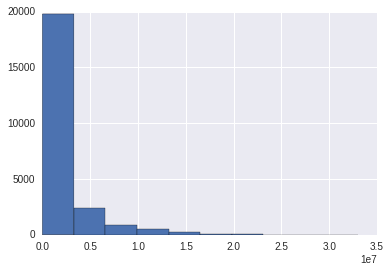

In [70]:
plt.hist(salary['salary'])